<a href="https://colab.research.google.com/github/Deolinda1506/Linear_regression_model/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Predicting wine quality- Linear Regression Model


In [74]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
from sklearn.linear_model import SGDRegressor




# Load the Dataset
Let's start by loading and inspecting the dataset

In [75]:
# 1. Load dataset
df = pd.read_csv('winequalityN.csv')

In [76]:
# Print some part of the dataset.
df.head(100)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,white,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6
96,white,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6
97,white,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,4


In [77]:
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (6497, 13)


In [78]:
df.info()  #information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [79]:
df.describe()   #statistical information about the dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [80]:
df.isnull().sum()    # ensuring there are no null values in the dataset


,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [81]:
# Replace zeros with NaN for specific columns
cols_with_zero_missing = ['fixed acidity', 'volatile acidity', 'citric acid',
                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, pd.NA)


In [82]:
# Fill with mean for numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# OR fill with median for numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [83]:
# Drop rows with any NaN
df.dropna(inplace=True)

# Drop columns with many NaN
df.dropna(axis=1, inplace=True)


In [84]:
print(df.isnull().sum())


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


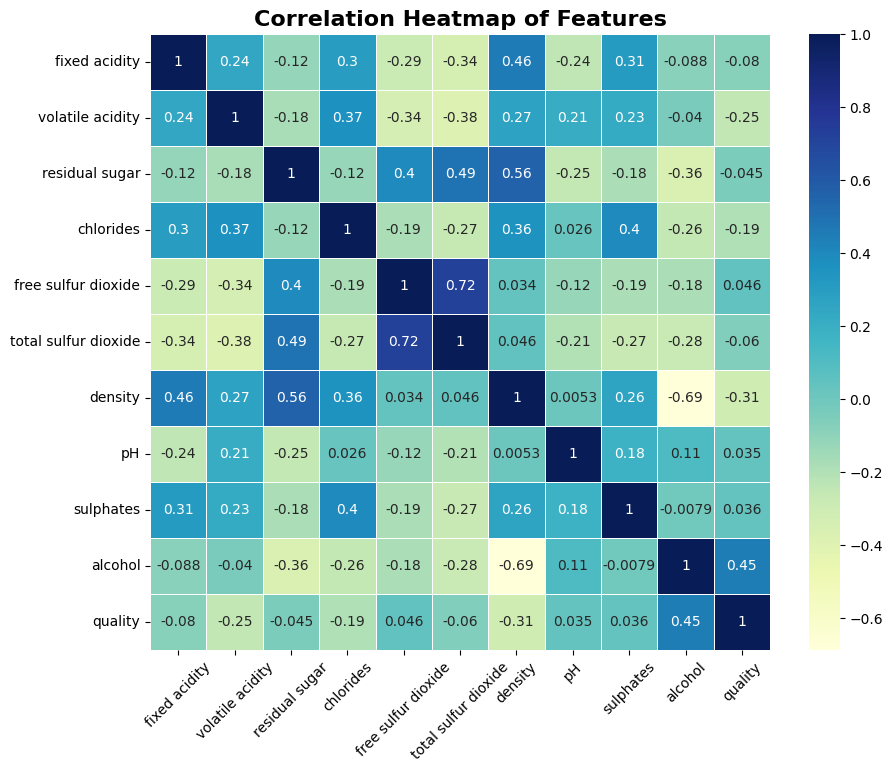

In [85]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap with new color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

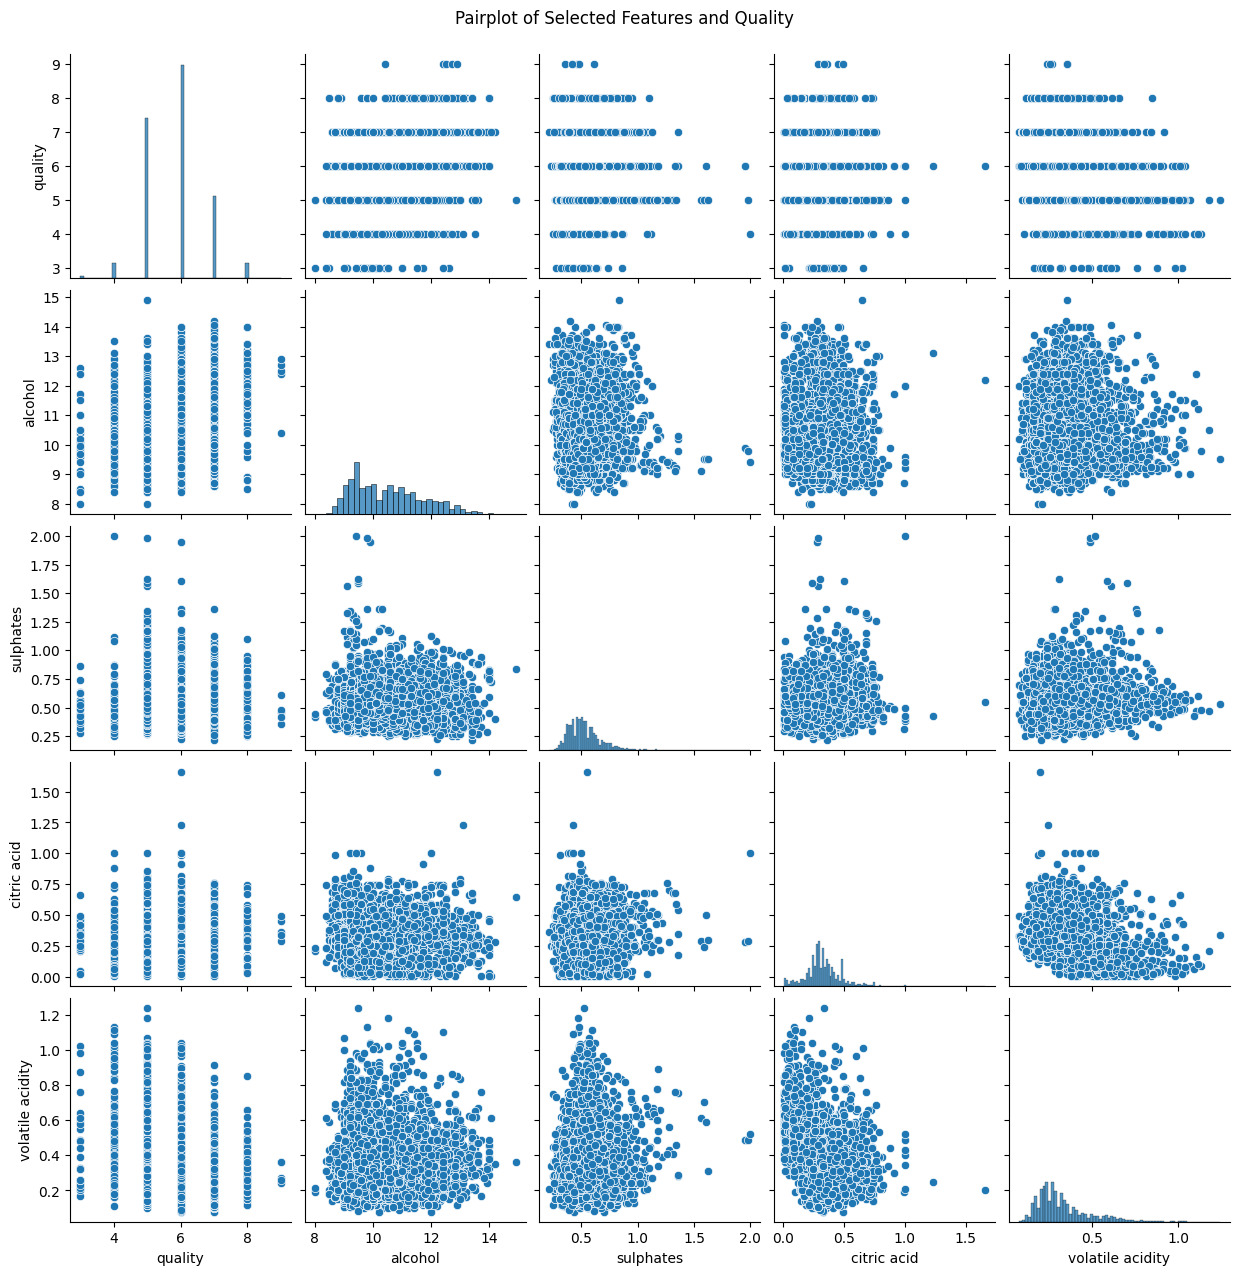

In [86]:
# Data Visualization: Pairplot for Key Variables
sns.pairplot(df[['quality', 'alcohol', 'sulphates', 'citric acid', 'volatile acidity']])
plt.suptitle('Pairplot of Selected Features and Quality', y=1.02)
plt.show()


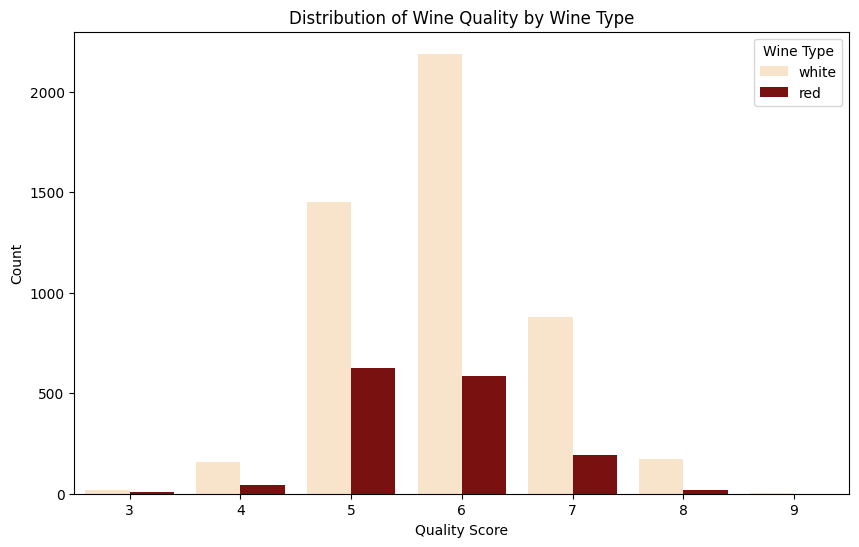

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df, palette={'white': '#FFE4C4', 'red': '#8B0000'})
plt.title('Distribution of Wine Quality by Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

# 📊 Data Preprocessing & Feature Selection:


In [88]:
# Select relevant features and target
features = ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
target = 'quality'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical variables, scaling for numerical variables
categorical_features = ['type']
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# 📈 Implementing Gradient Descent for Linear Regression


Train MSE: 0.6282225998542362 | Test MSE: 0.5969084708167476


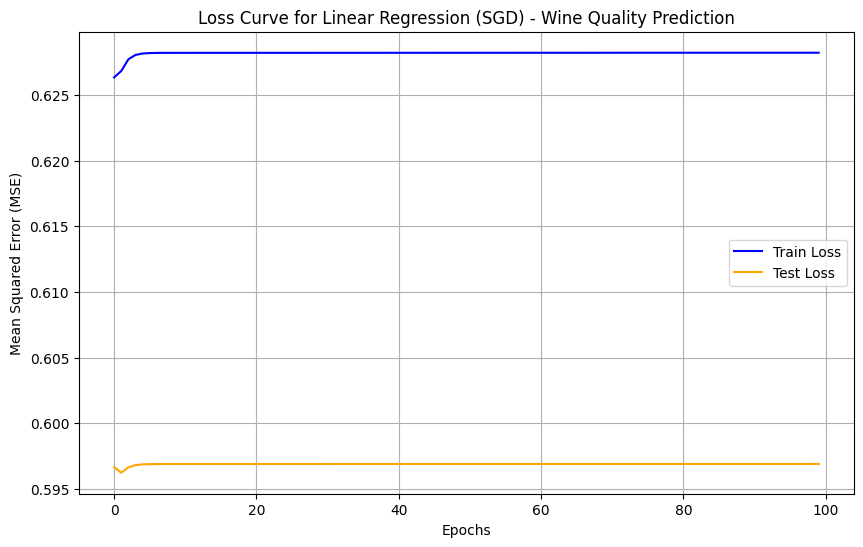

In [89]:
# Initialize SGDRegressor with warm_start to manually train multiple epochs
sgd_regressor = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

# Pipeline with SGDRegressor
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', sgd_regressor)
])

# Lists to store loss values
train_loss = []
test_loss = []

# Number of epochs
epochs = 100

# Training loop for multiple epochs
for epoch in range(epochs):
    lr_pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = lr_pipeline.predict(X_train)
    y_test_pred = lr_pipeline.predict(X_test)

    # Calculate MSE for train and test
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_loss.append(train_mse)
    test_loss.append(test_mse)

print(f"Train MSE: {train_mse} | Test MSE: {test_mse}")

# Plot Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_loss, label='Train Loss', color='blue')
plt.plot(range(epochs), test_loss, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve for Linear Regression (SGD) - Wine Quality Prediction')
plt.legend()
plt.grid(True)
plt.show()



# 🧮  Implementing Linear Regression


Linear Regression - Train MSE: 0.5373624163426495, Test MSE: 0.5382724500416044


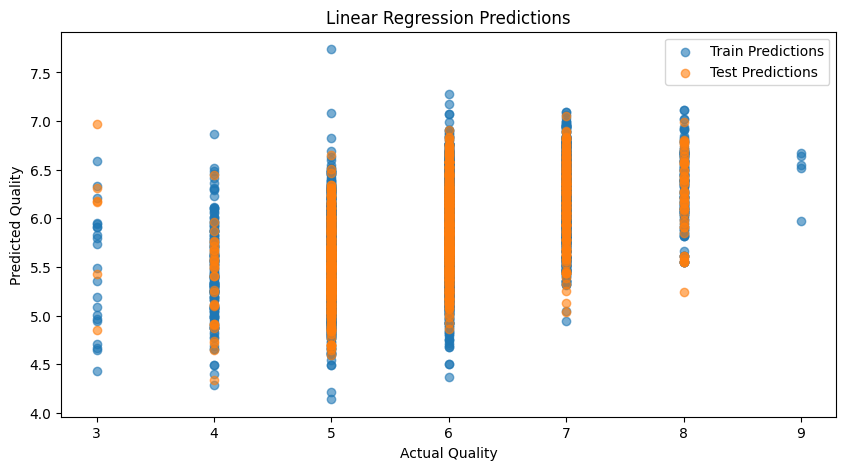

In [90]:
# Linear Regression Model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

# Evaluate Linear Regression
y_train_pred = lr_pipeline.predict(X_train)
y_test_pred = lr_pipeline.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)

print(f'Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}')

plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label='Train Predictions', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Predictions', alpha=0.6)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.show()

# 📈 Implementing Decision Tree and Randon Forest


In [97]:
# Decision Tree Model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

# Evaluate Decision Tree
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt = dt_pipeline.predict(X_test)

train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

print(f'Decision Tree - Train MSE: {train_mse_dt}, Test MSE: {test_mse_dt}')


Decision Tree - Train MSE: 0.0, Test MSE: 0.6800630417651694


In [98]:
# Random Forest Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

# Evaluate Random Forest
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f'Random Forest - Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}')

Random Forest - Train MSE: 0.22689191493349264, Test MSE: 0.3901594661911168


# 🏆  Saving the Best Model


In [93]:
# Choose Best Model
if test_mse_lr < test_mse_dt and test_mse_lr < test_mse_rf:
    best_model = lr_pipeline
    print("Best model: Linear Regression")
elif test_mse_dt < test_mse_rf:
    best_model = dt_pipeline
    print("Best model: Decision Tree")
else:
    best_model = rf_pipeline
    print("Best model: Random Forest")

Best model: Random Forest


In [94]:
joblib.dump(best_model, 'best_model.joblib')
print("Best model saved successfully")

Best model saved successfully


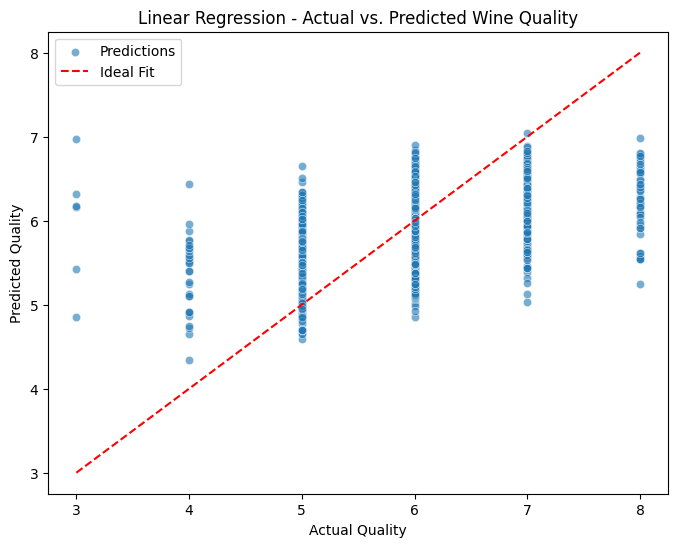

In [95]:
# Scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, label="Predictions")

# Best-fit line (y = x line for ideal predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression - Actual vs. Predicted Wine Quality")
plt.legend()
plt.show()


In [99]:

# Script for making predictions
def predict_quality(input_data):
    model = joblib.load('best_model.joblib')
    return model.predict(input_data)

# Example usage
example_input = pd.DataFrame({
    'type': ['white'],
    'fixed acidity': [7.0],
    'volatile acidity': [0.27],
    'citric acid': [0.36],
    'residual sugar': [20.7],
    'chlorides': [0.045],
    'free sulfur dioxide': [45.0],
    'total sulfur dioxide': [170.0],
    'density': [1.0010],
    'pH': [3.0],
    'sulphates': [0.45],
    'alcohol': [8.8]
})

predicted_quality = predict_quality(example_input)
print(f'Predicted Quality: {predicted_quality[0]}')




Predicted Quality: 5.649714806255248
